# <center> Numerical Method for Informatics</center>
## <center> Finite difference method: Lax-Wendroff Method in Transport Equation</center>

This course is devoted to student of Undergraduate Student of Informatics, Telkom University. 

Detail of Course


*   Course Name: (CSH4403) Numerical Method for Informatics

*   Creator: Dr. Putu Harry Gunawan



---








**NAMA : Rizka Vio Octriany Inggit S**

**NIM : 1301170121**

**Lax-Wendroff for Transport**

<center><img src = "https://i.imgur.com/p3jtWaD.png" align = "center"> </center>






# Exercise

**Exercise 1**

Compare the previous example with upwind method and plot all results in one frame.

**Exercise 2**

 Please solve the transport problem
\begin{equation*}
    \rho_t + b \rho_x = 0 
\end{equation*}
and the initial density of vehicle on domain $[-1,2]$,
\begin{equation*}
    \rho(x,0)=\nu(x)=\begin{cases}
    0, & \text{ if } -1 \leq x < 0\\
    1, & \text{ if } 0 \leq x < 1\\
    0, & \text{ otherwise}
    \end{cases}
\end{equation*}

*   Use Lax-Wendroff method for $b=1$, $N=10$ and $\Delta t=0.01$. Plot solutions at times $t=0$, $t=0.1$ and $t=1$.
*   Repeat (a), with $b=-1$!



# **B = 1 , t=0**

dx =  0.3333333333333333
dt =  0.01
Courant number =  0.030000000000000002


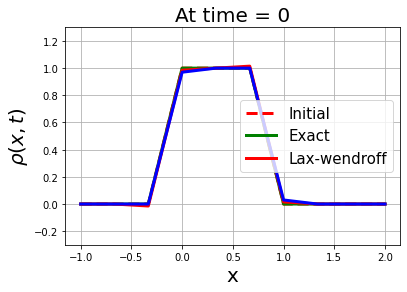

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def nu(xi):
  if xi >=-1 and xi<0:
    return 0
  if xi >= 0 and xi<1:
    return 1
  else:
    return 0


L1 = -1 
L2 =  2
N  = 10

#diskritnya
x = np.linspace(L1,L2,N)#for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)


Tfin = 0
#t = np.linspace(0,Tfin, T)
dt = 0.01
print("dt = ",dt)

b= 1
r= b*dt/dx #arah ke kanan
print('Courant number = ',r)

#kondisi awal, set matriks bawah
#Initial condition
rho = np.array([])
rhoup = np.array([])
for i in range (0,N):
  rho = np.append(rho,nu(x[i]))
  rhoup = np.append(rhoup,nu(x[i]))

#plot kondisi awal
init = rho   # for plot purpose in initial condition

time=0
while (time<=Tfin):
  time = time + dt

  #rho baru
  rho_n = np.array([0]) #Diriclet boundary left (diujug selalu 0) batas kiri diberikan nilai 0
  rho_nup = np.array([0])
  for i in range (1,N-1): #ditengah
     rho_n = np.append(rho_n, rho[i] - (r/2)*(rho[i+1] - rho[i-1]) + ((r*r)/2)*(rho[i+1] - 2*rho[i] + rho[i-1]))
     rho_nup = np.append(rho_nup , rhoup[i] - r*(rhoup[i] - rhoup[i-1]))

  rho_n = np.append(rho_n,0)  #Diriclet boundary right
  rho_nup = np.append(rho_nup,0)
  rho = rho_n #update nilai rho lama dengan yang baru
  rhoup = rho_nup
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,nu(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)



plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rhoup, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Lax-wendroff'],fontsize=15)
plt.show()

#**b= 1,t = 0.1**

dx =  0.3333333333333333
dt =  0.01
Courant number =  0.030000000000000002


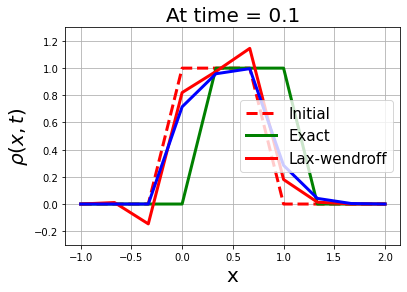

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#membuat fungsi awal new
def nu(xi):
  if xi >=-1 and xi<0:
    return 0
  if xi >= 0 and xi<1:
    return 1
  else:
    return 0


L1 = -1 #domain
L2 =  2
N  = 10

#diskritnya
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)


Tfin = 0.1
#t = np.linspace(0,Tfin, T)
dt = 0.01
print("dt = ",dt)

b= 1
r= b*dt/dx #arah ke kanan
print('Courant number = ',r)

#kondisi awal, set matriks bawah
#Initial condition
rho = np.array([])
rhoup = np.array([])
for i in range (0,N):
  rho = np.append(rho,nu(x[i]))
  rhoup = np.append(rhoup,nu(x[i]))

#plot kondisi awal
init = rho   # for plot purpose in initial condition

time=0
while (time<=Tfin):
  time = time + dt

  #rho baru
  rho_n = np.array([0]) #Diriclet boundary left (diujug selalu 0) batas kiri diberikan nilai 0
  rho_nup = np.array([0])
  for i in range (1,N-1): #ditengah
     rho_n = np.append(rho_n, rho[i] - (r/2)*(rho[i+1] - rho[i-1]) + ((r*r)/2)*(rho[i+1] - 2*rho[i] + rho[i-1]))
     rho_nup = np.append(rho_nup , rhoup[i] - r*(rhoup[i] - rhoup[i-1]))

  rho_n = np.append(rho_n,0)  #Diriclet boundary right
  rho_nup = np.append(rho_nup,0)
  rho = rho_n #update nilai rho lama dengan yang baru
  rhoup = rho_nup
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,nu(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)

plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rhoup, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Lax-wendroff'],fontsize=15)
plt.show()

# **B=10,t = 1**

dx =  0.3333333333333333
dt =  0.01
Courant number =  0.030000000000000002


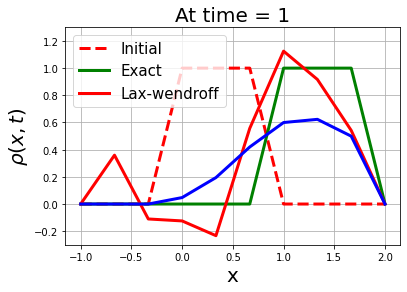

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#membuat fungsi awal new
def nu(xi):
  if xi >=-1 and xi<0:
    return 0
  if xi >= 0 and xi<1:
    return 1
  else:
    return 0


L1 = -1 #domain
L2 =  2
N  = 10

#diskritnya
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)


Tfin = 1
#t = np.linspace(0,Tfin, T)
dt = 0.01
print("dt = ",dt)

b= 1
r= b*dt/dx #arah ke kanan
print('Courant number = ',r)

#kondisi awal, set matriks bawah
#Initial condition
rho = np.array([])
rhoup = np.array([])
for i in range (0,N):
  rho = np.append(rho,nu(x[i]))
  rhoup = np.append(rhoup,nu(x[i]))

#plot kondisi awal
init = rho   # for plot purpose in initial condition

time=0
while (time<=Tfin):
  time = time + dt

  #rho baru
  rho_n = np.array([0]) #Diriclet boundary left (diujug selalu 0) batas kiri diberikan nilai 0
  rho_nup = np.array([0])
  for i in range (1,N-1): #ditengah
     rho_n = np.append(rho_n, rho[i] - (r/2)*(rho[i+1] - rho[i-1]) + ((r*r)/2)*(rho[i+1] - 2*rho[i] + rho[i-1]))
     rho_nup = np.append(rho_nup , rhoup[i] - r*(rhoup[i] - rhoup[i-1]))

  rho_n = np.append(rho_n,0)  #Diriclet boundary right
  rho_nup = np.append(rho_nup,0)
  rho = rho_n #update nilai rho lama dengan yang baru
  rhoup = rho_nup
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,nu(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)


plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rhoup, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Lax-wendroff'],fontsize=15)
plt.show()

# **b=-1, t=0**

dx =  0.3333333333333333
dt =  0.01
Courant number =  -0.030000000000000002


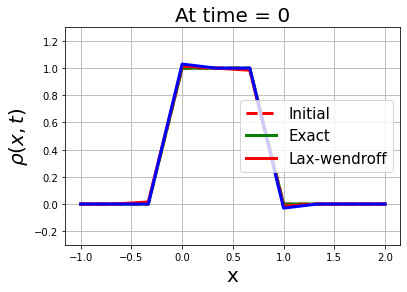

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#membuat fungsi awal new
def nu(xi):
  if xi >=-1 and xi<0:
    return 0
  if xi >= 0 and xi<1:
    return 1
  else:
    return 0


L1 = -1 #domain
L2 =  2
N  = 10

#diskritnya
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)


Tfin = 0
#t = np.linspace(0,Tfin, T)
dt = 0.01
print("dt = ",dt)

b= -1
r= b*dt/dx #arah ke kanan
print('Courant number = ',r)

#kondisi awal, set matriks bawah
#Initial condition
rho = np.array([])
rhoup = np.array([])
for i in range (0,N):
  rho = np.append(rho,nu(x[i]))
  rhoup = np.append(rhoup,nu(x[i]))

#plot kondisi awal
init = rho   # for plot purpose in initial condition

time=0
while (time<=Tfin):
  time = time + dt

  #rho baru
  rho_n = np.array([0]) #Diriclet boundary left (diujug selalu 0) batas kiri diberikan nilai 0
  rho_nup = np.array([0])
  for i in range (1,N-1): #ditengah
     rho_n = np.append(rho_n, rho[i] - (r/2)*(rho[i+1] - rho[i-1]) + ((r*r)/2)*(rho[i+1] - 2*rho[i] + rho[i-1]))
     rho_nup = np.append(rho_nup , rhoup[i] - r*(rhoup[i] - rhoup[i-1]))

  rho_n = np.append(rho_n,0)  #Diriclet boundary right
  rho_nup = np.append(rho_nup,0)
  rho = rho_n #update nilai rho lama dengan yang baru
  rhoup = rho_nup
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,nu(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)



plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rhoup, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Lax-wendroff'],fontsize=15)
plt.show()

# **b=-1,t = 0.1**

dx =  0.3333333333333333
dt =  0.01
Courant number =  -0.030000000000000002


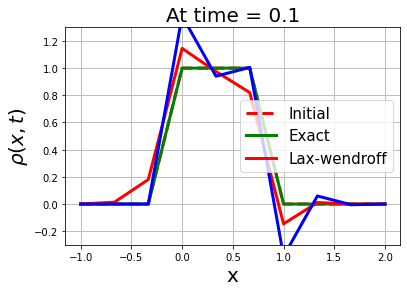

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#membuat fungsi awal new
def nu(xi):
  if xi >=-1 and xi<0:
    return 0
  if xi >= 0 and xi<1:
    return 1
  else:
    return 0


L1 = -1 #domain
L2 =  2
N  = 10

#diskritnya
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)


Tfin = 0.1
#t = np.linspace(0,Tfin, T)
dt = 0.01
print("dt = ",dt)

b= -1
r= b*dt/dx #arah ke kanan
print('Courant number = ',r)

#kondisi awal, set matriks bawah
#Initial condition
rho = np.array([])
rhoup = np.array([])
for i in range (0,N):
  rho = np.append(rho,nu(x[i]))
  rhoup = np.append(rhoup,nu(x[i]))

#plot kondisi awal
init = rho   # for plot purpose in initial condition

time=0
while (time<=Tfin):
  time = time + dt

  #rho baru
  rho_n = np.array([0]) #Diriclet boundary left (diujug selalu 0) batas kiri diberikan nilai 0
  rho_nup = np.array([0])
  for i in range (1,N-1): #ditengah
     rho_n = np.append(rho_n, rho[i] - (r/2)*(rho[i+1] - rho[i-1]) + ((r*r)/2)*(rho[i+1] - 2*rho[i] + rho[i-1]))
     rho_nup = np.append(rho_nup , rhoup[i] - r*(rhoup[i] - rhoup[i-1]))

  rho_n = np.append(rho_n,0)  #Diriclet boundary right
  rho_nup = np.append(rho_nup,0)
  rho = rho_n #update nilai rho lama dengan yang baru
  rhoup = rho_nup
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,nu(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)


plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rhoup, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Lax-wendroff'],fontsize=15)
plt.show()

#**b = -1,t = 1** 

dx =  0.3333333333333333
dt =  0.01
Courant number =  -0.030000000000000002


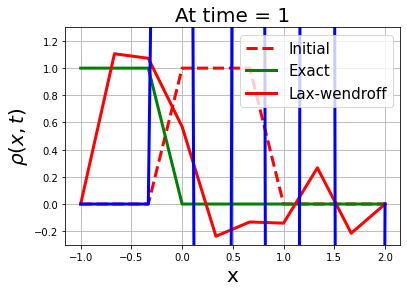

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#membuat fungsi awal new
def nu(xi):
  if xi >=-1 and xi<0:
    return 0
  if xi >= 0 and xi<1:
    return 1
  else:
    return 0


L1 = -1 #domain
L2 =  2
N  = 10

#diskritnya
x = np.linspace(L1,L2,N) #for plot purpose
dx = (L2 -L1)/(N-1)
print("dx = ",dx)


Tfin = 1
#t = np.linspace(0,Tfin, T)
dt = 0.01
print("dt = ",dt)

b= -1
r= b*dt/dx #arah ke kanan
print('Courant number = ',r)

#kondisi awal, set matriks bawah
#Initial condition
rho = np.array([])
rhoup = np.array([])
for i in range (0,N):
  rho = np.append(rho,nu(x[i]))
  rhoup = np.append(rhoup,nu(x[i]))

#plot kondisi awal
init = rho   # for plot purpose in initial condition

time=0
while (time<=Tfin):
  time = time + dt

  #rho baru
  rho_n = np.array([0]) #Diriclet boundary left (diujug selalu 0) batas kiri diberikan nilai 0
  rho_nup = np.array([0])
  for i in range (1,N-1): #ditengah
     rho_n = np.append(rho_n, rho[i] - (r/2)*(rho[i+1] - rho[i-1]) + ((r*r)/2)*(rho[i+1] - 2*rho[i] + rho[i-1]))
     rho_nup = np.append(rho_nup , rhoup[i] - r*(rhoup[i] - rhoup[i-1]))

  rho_n = np.append(rho_n,0)  #Diriclet boundary right
  rho_nup = np.append(rho_nup,0)
  rho = rho_n #update nilai rho lama dengan yang baru
  rhoup = rho_nup
#Endwhile


#Exact Solution
exact = np.array([])
for i in range(0,N):
    exact = np.append(exact,nu(x[i] -b*Tfin))


plt.grid()
plt.xlabel("x",fontsize=20)
plt.ylabel(r"$\rho(x,t)$",fontsize=20)
plt.ylim(-0.3,1.3)



plt.plot(x,init,'--', color='red', linewidth=3)
plt.plot(x,exact, color='green', linewidth=3)
plt.plot(x,rho, color='red', linewidth=3)
plt.plot(x,rhoup, color='blue', linewidth=3)
plt.title("At time = {}".format(Tfin),fontsize=20)
plt.legend(['Initial','Exact', 'Lax-wendroff'],fontsize=15)
plt.show()